<a href="https://colab.research.google.com/github/sabrinaavv/Portfolio-Data-Analyst/blob/main/Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: #ff6347; text-align: center; font-family: 'Courier New', Courier, monospace; font-weight: bold; text-transform: uppercase; border-bottom: 3px solid #ff6347;">
    🔍 ANALYTICS TOOLS 🔍
</h1>


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('crime_data.csv')
df = data.copy()
df.head()

,Disposition,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Report Type,Category
0,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
1,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
2,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
3,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
4,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB


In [ ]:
df.isnull().sum()

,0
Disposition,0
OffenderStatus,0
Offender_Race,0
Offender_Gender,0
Offender_Age,0
PersonType,0
Victim_Race,0
Victim_Gender,0
Victim_Age,0
Victim_Fatal_Status,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Offender_Age,6638.0,34.634378,12.797407,11.0,25.0,33.0,42.0,83.0
Victim_Age,6638.0,38.590539,15.297202,0.0,27.0,36.0,48.0,124.0


<h1 style="color: #32cd32; text-align: center; font-family: 'Courier New', Courier, monospace; font-weight: bold; text-transform: uppercase; border-bottom: 3px solid #32cd32;">
    📊 DATA VISUALIZATION 📊
</h1>


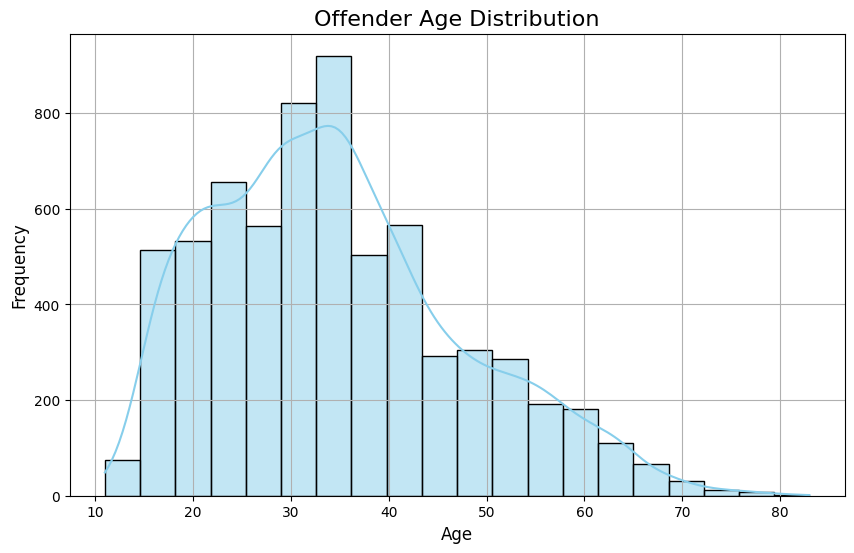

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Offender_Age'], kde=True, color='skyblue', bins=20)
plt.title('Offender Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


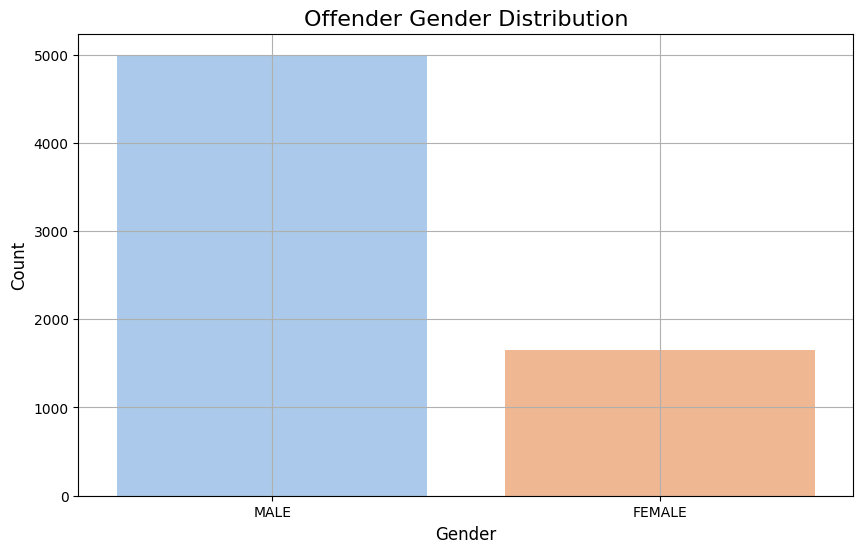

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Offender_Gender', palette='pastel')
plt.title('Offender Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True)
plt.show()


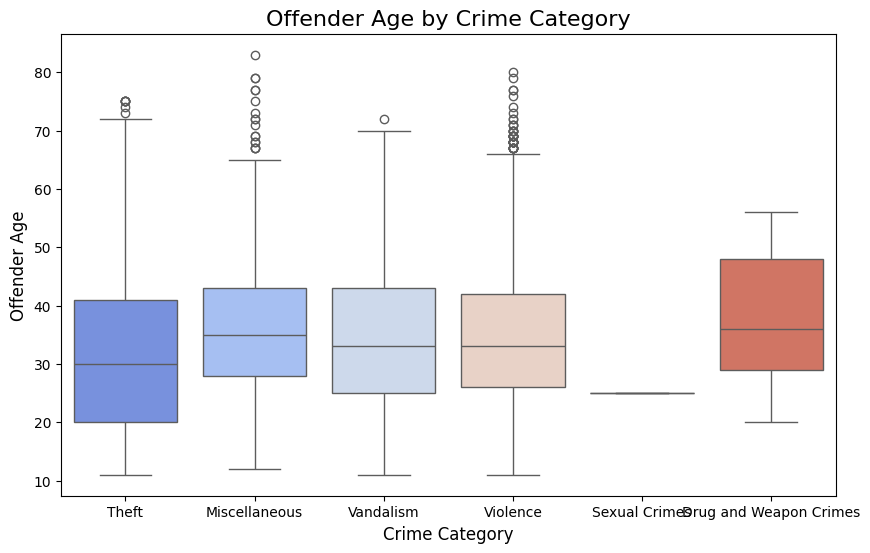

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Offender_Age', palette='coolwarm')
plt.title('Offender Age by Crime Category', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Offender Age', fontsize=12)
plt.show()


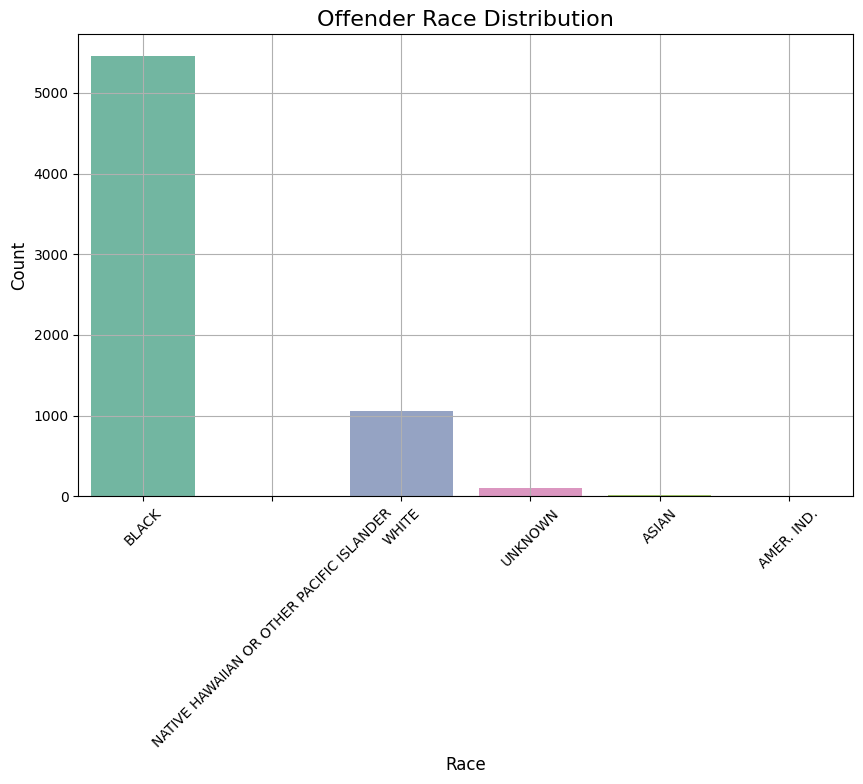

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Offender_Race', palette='Set2')
plt.title('Offender Race Distribution', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


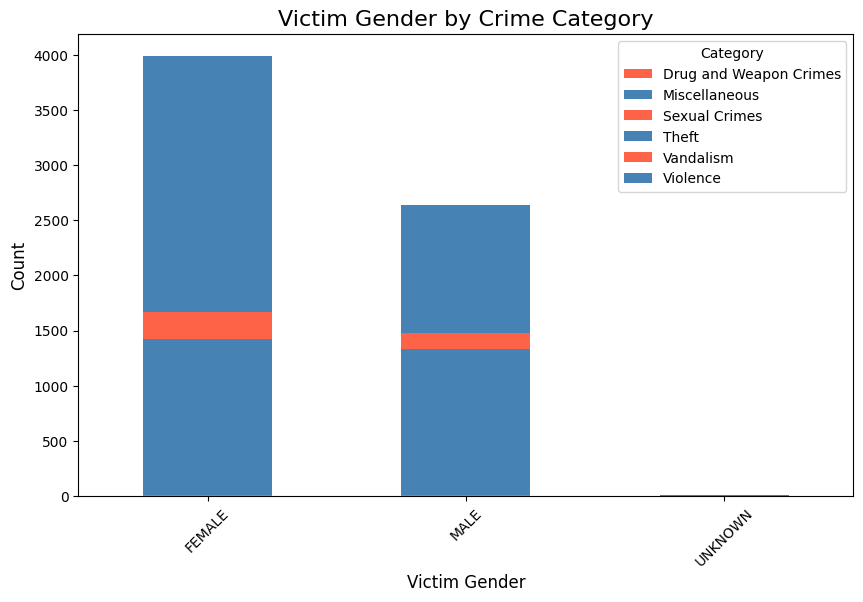

In [ ]:
victim_gender_category = pd.crosstab(df['Victim_Gender'], df['Category'])
victim_gender_category.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff6347', '#4682b4'])
plt.title('Victim Gender by Crime Category', fontsize=16)
plt.xlabel('Victim Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


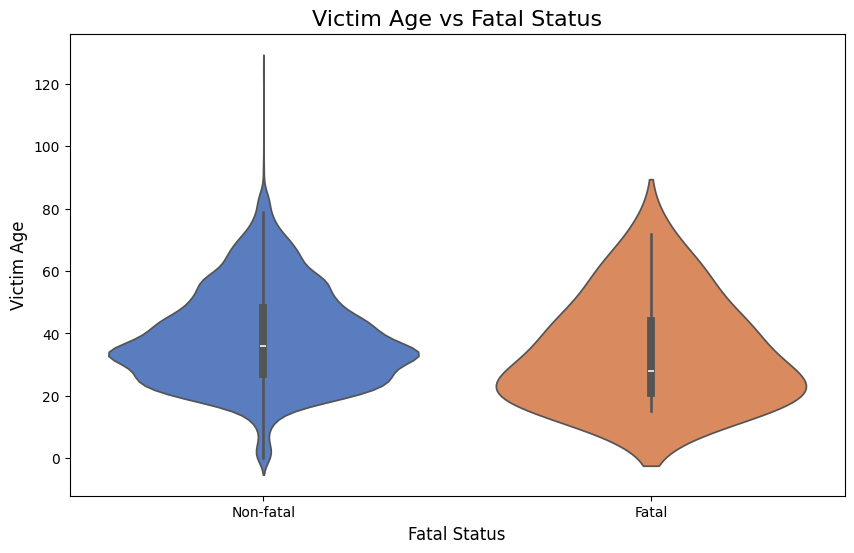

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Victim_Fatal_Status', y='Victim_Age', palette='muted')
plt.title('Victim Age vs Fatal Status', fontsize=16)
plt.xlabel('Fatal Status', fontsize=12)
plt.ylabel('Victim Age', fontsize=12)
plt.show()


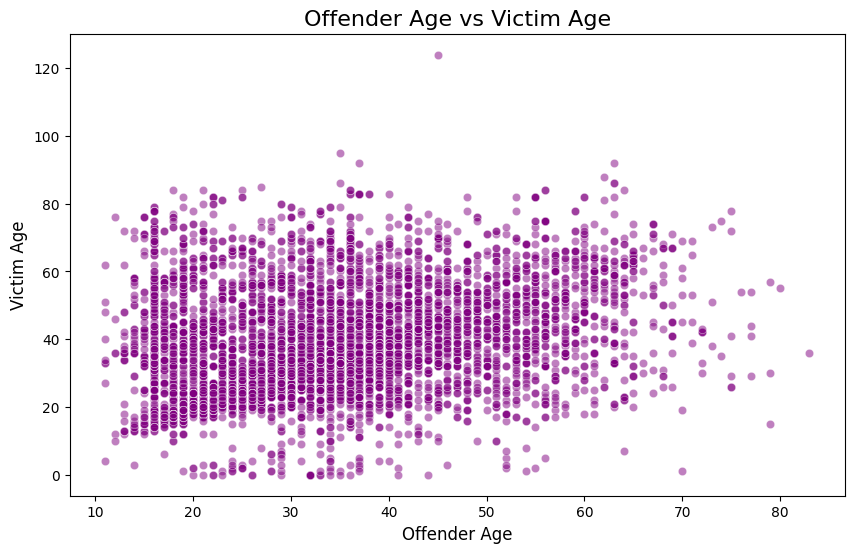

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Offender_Age', y='Victim_Age', color='purple', alpha=0.5)
plt.title('Offender Age vs Victim Age', fontsize=16)
plt.xlabel('Offender Age', fontsize=12)
plt.ylabel('Victim Age', fontsize=12)
plt.show()


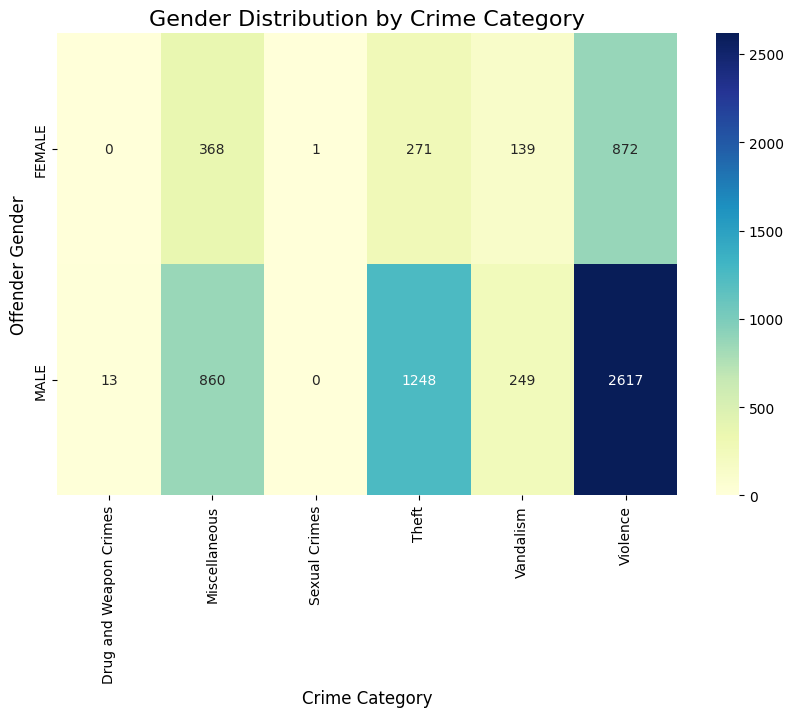

In [ ]:
gender_category = pd.crosstab(df['Offender_Gender'], df['Category'])
plt.figure(figsize=(10, 6))
sns.heatmap(gender_category, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Gender Distribution by Crime Category', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Offender Gender', fontsize=12)
plt.show()


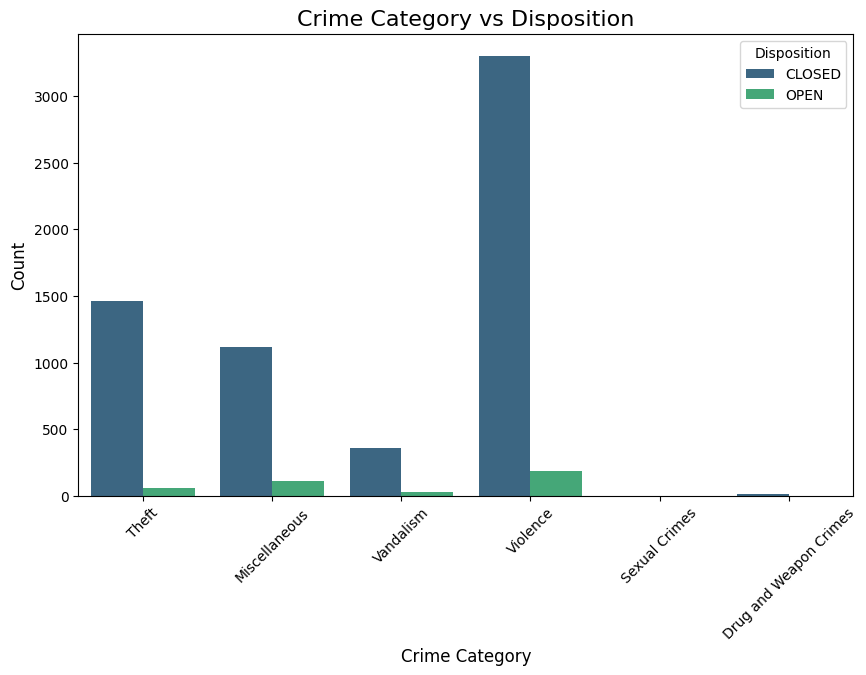

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Disposition', palette='viridis')
plt.title('Crime Category vs Disposition', fontsize=16)
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


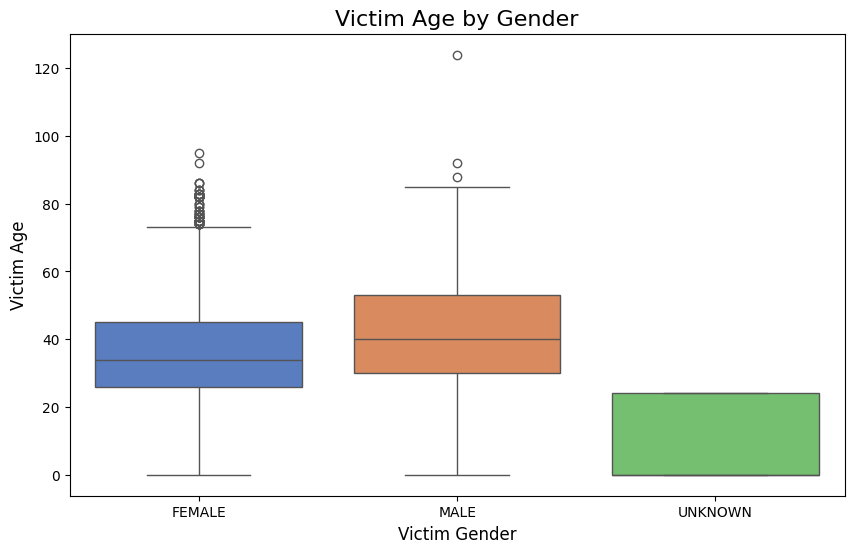

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Victim_Gender', y='Victim_Age', palette='muted')
plt.title('Victim Age by Gender', fontsize=16)
plt.xlabel('Victim Gender', fontsize=12)
plt.ylabel('Victim Age', fontsize=12)
plt.show()


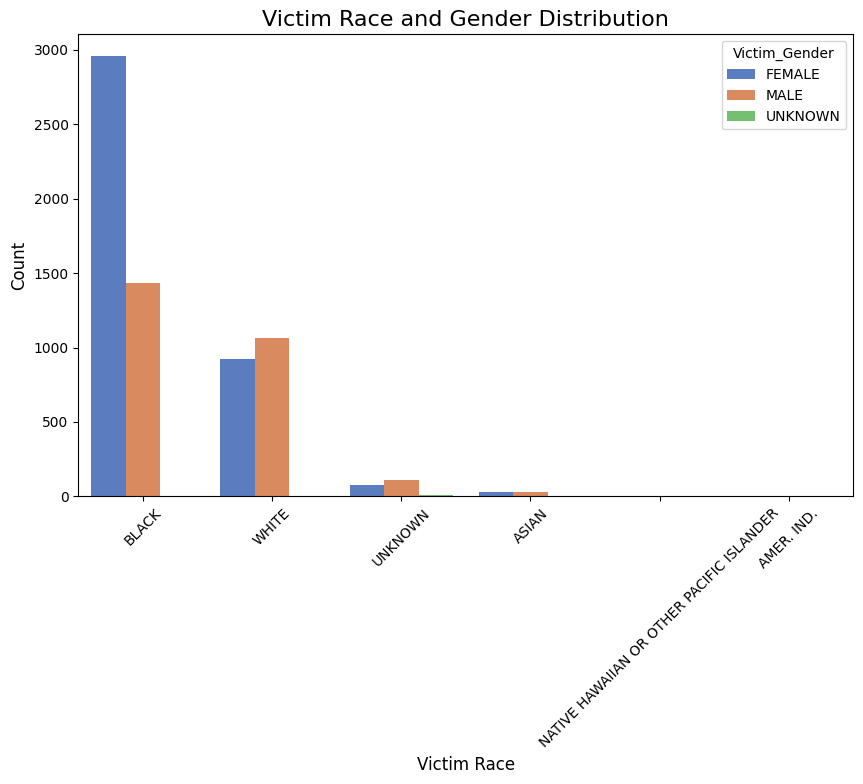

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Victim_Race', hue='Victim_Gender', palette='muted')
plt.title('Victim Race and Gender Distribution', fontsize=16)
plt.xlabel('Victim Race', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


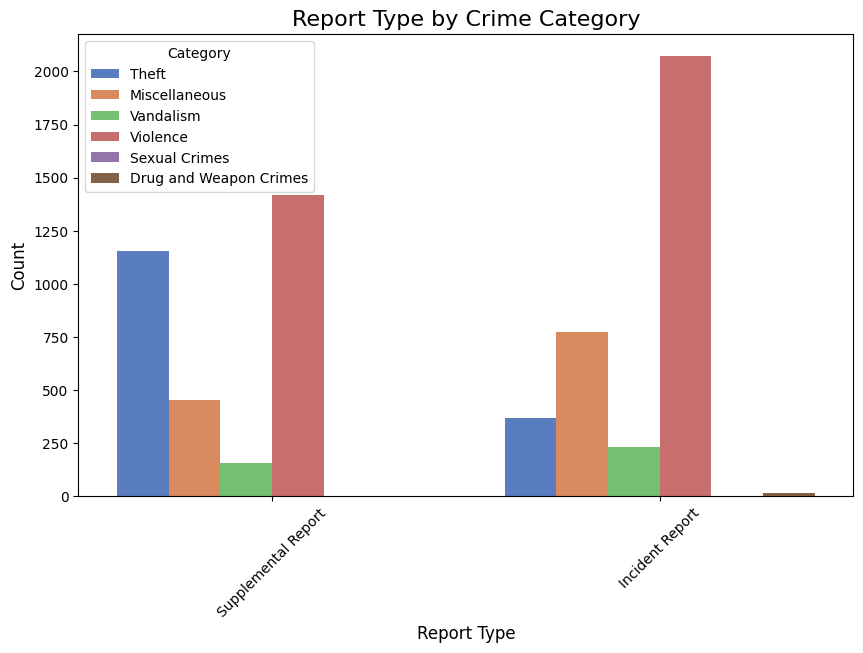

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Report Type', hue='Category', palette='muted')
plt.title('Report Type by Crime Category', fontsize=16)
plt.xlabel('Report Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


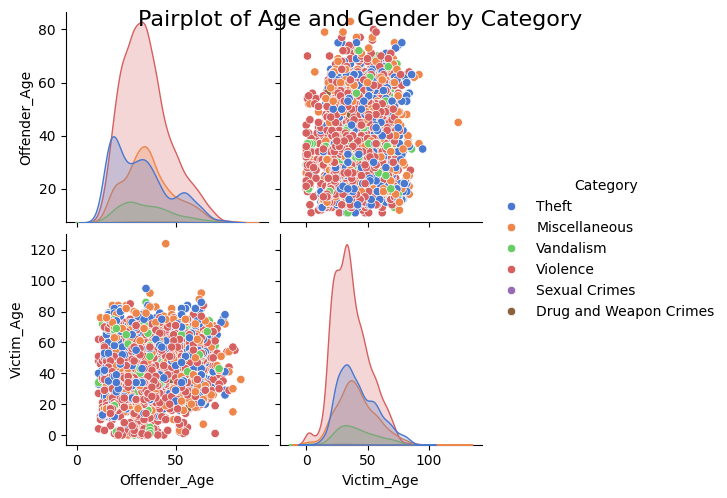

In [ ]:
sns.pairplot(df[['Offender_Age', 'Victim_Age', 'Offender_Gender', 'Category']], hue='Category', palette='muted')
plt.suptitle('Pairplot of Age and Gender by Category', fontsize=16)
plt.show()


<h1 style="color: #ff69b4; text-align: center; font-family: 'Courier New', Courier, monospace; font-weight: bold; text-transform: uppercase; border-bottom: 3px solid #ff69b4;">
    🤖 MACHINE LEARNING 🤖
</h1>


In [ ]:
label_encoders = {}


categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:

    original_values = df[column].unique()


    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


    encoded_values = df[column].unique()

    decoded_values = label_encoders[column].inverse_transform(encoded_values)


    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")



Disposition Encoding and Decoding:
0 -> CLOSED
1 -> OPEN

OffenderStatus Encoding and Decoding:
0 -> ARRESTED

Offender_Race Encoding and Decoding:
2 -> BLACK
3 -> NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER
5 -> WHITE
4 -> UNKNOWN
1 -> ASIAN
0 -> AMER. IND.

Offender_Gender Encoding and Decoding:
1 -> MALE
0 -> FEMALE

PersonType Encoding and Decoding:
2 -> VICTIM
1 -> REPORTING PERSON
0 -> INTERVIEW

Victim_Race Encoding and Decoding:
2 -> BLACK
5 -> WHITE
4 -> UNKNOWN
1 -> ASIAN
3 -> NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER
0 -> AMER. IND.

Victim_Gender Encoding and Decoding:
0 -> FEMALE
1 -> MALE
2 -> UNKNOWN

Victim_Fatal_Status Encoding and Decoding:
1 -> Non-fatal
0 -> Fatal

Report Type Encoding and Decoding:
1 -> Supplemental Report
0 -> Incident Report

Category Encoding and Decoding:
3 -> Theft
1 -> Miscellaneous
4 -> Vandalism
5 -> Violence
2 -> Sexual Crimes
0 -> Drug and Weapon Crimes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   int64  
 1   OffenderStatus       6638 non-null   int64  
 2   Offender_Race        6638 non-null   int64  
 3   Offender_Gender      6638 non-null   int64  
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   int64  
 6   Victim_Race          6638 non-null   int64  
 7   Victim_Gender        6638 non-null   int64  
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   int64  
 10  Report Type          6638 non-null   int64  
 11  Category             6638 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 622.4 KB


In [ ]:
X = df.drop(columns=['Disposition'])
y = df['Disposition']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9510542168674698
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1253
           1       0.73      0.21      0.33        75

    accuracy                           0.95      1328
   macro avg       0.84      0.60      0.65      1328
weighted avg       0.94      0.95      0.94      1328

Confusion Matrix:
[[1247    6]
 [  59   16]]


In [ ]:


lr_model = LogisticRegression(max_iter=1000, random_state=42)


lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Accuracy: 0.9435240963855421
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1253
           1       0.00      0.00      0.00        75

    accuracy                           0.94      1328
   macro avg       0.47      0.50      0.49      1328
weighted avg       0.89      0.94      0.92      1328

Confusion Matrix:
[[1253    0]
 [  75    0]]


In [ ]:

dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.9284638554216867
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1253
           1       0.35      0.31      0.33        75

    accuracy                           0.93      1328
   macro avg       0.65      0.64      0.64      1328
weighted avg       0.92      0.93      0.93      1328

Confusion Matrix:
[[1210   43]
 [  52   23]]


In [ ]:

knn_model = KNeighborsClassifier()


knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.9382530120481928
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1253
           1       0.23      0.04      0.07        75

    accuracy                           0.94      1328
   macro avg       0.59      0.52      0.52      1328
weighted avg       0.90      0.94      0.92      1328

Confusion Matrix:
[[1243   10]
 [  72    3]]


In [ ]:
models = ['Random Forest', 'Logistic Regression', 'Decision Tree','KNN']
accuracies = [accuracy_score(y_test, rf_model.predict(X_test)),
              accuracy_score(y_test, lr_model.predict(X_test)),
              accuracy_score(y_test, dt_model.predict(X_test)),
              accuracy_score(y_test, knn_model.predict(X_test)),
             ]


model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(model_comparison)


                 Model  Accuracy
0        Random Forest  0.951054
1  Logistic Regression  0.943524
2        Decision Tree  0.928464
3                  KNN  0.938253
